# Première utilisation de ML

## Introvert VS Extrovert

Pour ce premier projet en machine learning et plus précisément en classification j'ai récupérer un fichier CSV issu de Kaggle contenant différentes variables sur les personnes introverties et extraverties.

### Import des librairies

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Dropdown, IntSlider

### Lecture du fichier CSV dans un DataFrame

In [2]:
df = pd.read_csv("Dataset/personality_dataset.csv", sep=",")

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
df.shape

(2900, 8)

Ce fichier comporte 2900 lignes et 8 colonnes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


Ce fichier ne contient que des variables de types `float64` ou `object`.

In [5]:
df.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [36]:
categorical_cols = df.select_dtypes(include="object").keys().to_list()
df[categorical_cols] = df[categorical_cols].fillna("Unknow")

In [7]:
numerical_cols = df.select_dtypes(include="float64").keys().to_list()
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [8]:
df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [22]:
def pie_chart(col):
    count = df[col].value_counts(normalize=True).plot(kind = "pie")
    plt.ylabel("proportion")
    plt.title(f"Répartition de la variable {col}")
    return plt.show()

In [23]:
col_selector = Dropdown(options=categorical_cols, description="Colonne")
widget = interact(pie_chart, col=col_selector)
display(widget)


interactive(children=(Dropdown(description='Colonne', options=('Stage_fear', 'Drained_after_socializing', 'Per…

<function __main__.pie_chart(col)>

In [33]:
def scatter_plot(var_x, var_y, var_quali=None):
    plt.figure(figsize=(8, 6))
    
    sns.scatterplot(
        data=df,
        x=var_x,
        y=var_y,
        hue=var_quali
    )

    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.title(f"{var_x} VS {var_y}")
    
    plt.show()

    return plt.show()

In [50]:
# Création du widget interactif
col_x_selector = Dropdown(options=numerical_cols, description="X")
col_y_selector = Dropdown(options=numerical_cols, description="Y")
col_hue_selector = Dropdown(options=categorical_cols, description="Catégorie")

interact(scatter_plot, var_x=col_x_selector, var_y=col_y_selector, var_quali=col_hue_selector)

interactive(children=(Dropdown(description='X', options=('Time_spent_Alone', 'Social_event_attendance', 'Going…

<function __main__.scatter_plot(var_x, var_y, var_quali=None)>

In [57]:
def hist_plot(numeric_col, bins, categorical_col):

    sns.histplot(
        data=df,
        x=numeric_col,
        bins= bins,
        hue=categorical_col,
        kde=True
    )

    plt.xlabel(numeric_col)
    plt.ylabel("Count")
    plt.title(f"Histogramme of {numeric_col}")

    return plt.show()

In [58]:
# Création du widget interactif
col_selector = Dropdown(options=numerical_cols, description="X")
bins_slider = IntSlider(min=5, max=100, step=5, value=20, description="Bins")
col_hue_selector = Dropdown(options=categorical_cols, description="Catégorie")

interact(hist_plot, numeric_col=col_selector, categorical_col=col_hue_selector,  bins=bins_slider)

interactive(children=(Dropdown(description='X', options=('Time_spent_Alone', 'Social_event_attendance', 'Going…

<function __main__.hist_plot(numeric_col, bins, categorical_col)>

<Axes: >

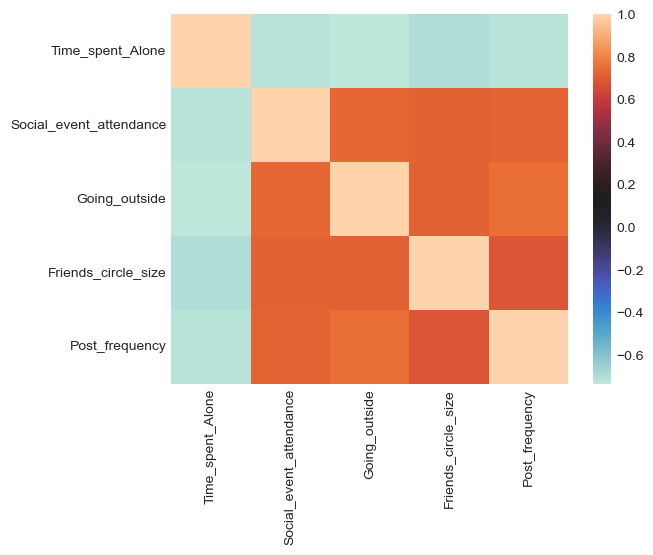

In [61]:
sns.heatmap(df[numerical_cols].corr(), cmap="icefire")

## Machine Learning

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [67]:
df["Personality"] = df["Personality"].replace(["Introvert","Extrovert"],[0,1])

In [84]:
data = numerical_cols
data.columns

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency', 'Personality'],
      dtype='object')

In [86]:
X = data.drop("Personality",axis=1).values
y = data["Personality"].values

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
print(f"Train score : {model.score(X_train, y_train)}" )
print(f"Test score : {model.score(X_test, y_test)}" )


Train score : 0.9801724137931035
Test score : 0.9172413793103448


In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
cross_val_score(RandomForestClassifier(4), X_train, y_train, cv=5, scoring="accuracy").mean()

np.float64(0.9030172413793103)

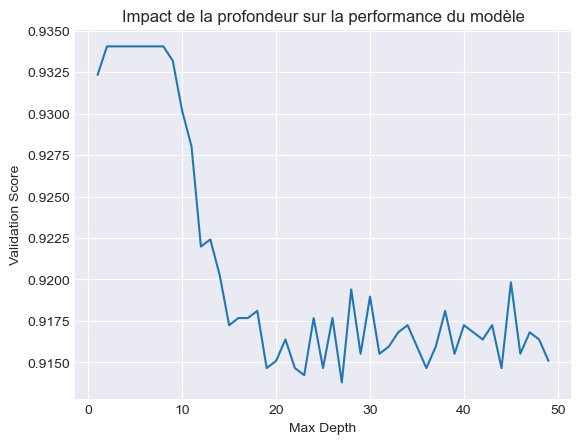

In [101]:
val_score = []
for k in range(1, 50):
    model = RandomForestClassifier(n_estimators=100, max_depth=k) 
    score = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1).mean()
    val_score.append(score)

plt.plot(range(1, 50), val_score)
plt.xlabel("Max Depth")
plt.ylabel("Validation Score")
plt.title("Impact de la profondeur sur la performance du modèle")
plt.show()

In [102]:
from sklearn.model_selection import validation_curve

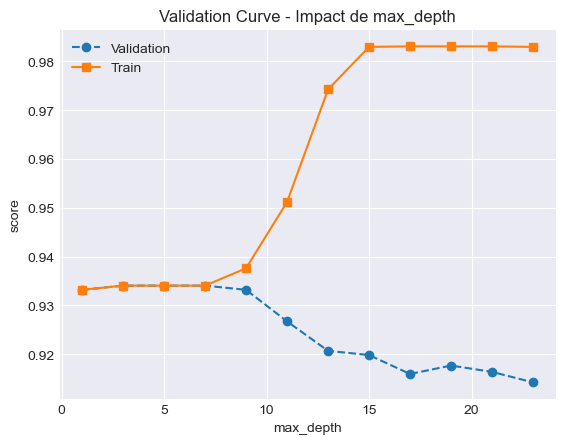

In [105]:
model = RandomForestClassifier()
k = np.arange(1, 25, 2) 

train_score, val_score = validation_curve(model, X_train, y_train, param_name="max_depth", param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label="Validation", linestyle="--", marker="o")
plt.plot(k, train_score.mean(axis=1), label="Train", linestyle="-", marker="s")

plt.xlabel("max_depth")
plt.ylabel("score")
plt.title("Validation Curve - Impact de max_depth")
plt.legend()
plt.grid(True)
plt.show()

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
param_grid = {
    "n_estimators": [50, 100, 200],  # Nombre d'arbres dans la forêt
    "max_depth": np.arange(5, 20, 5),  # Profondeur maximale des arbres
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 5, 10, 15]),
                         'n_estimators': [50, 100, 200]})

In [108]:
grid.best_score_

np.float64(0.9340517241379309)

In [109]:
grid.best_params_

{'max_depth': np.int64(5), 'n_estimators': 50}

In [110]:
model = grid.best_estimator_

model.score(X_test, y_test)

0.9362068965517242

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
confusion_matrix(y_test, model.predict(X_test))

array([[265,  16],
       [ 21, 278]])

In [113]:
from sklearn.model_selection import learning_curve

[ 185  371  556  742  928 1113 1299 1484 1670 1856]


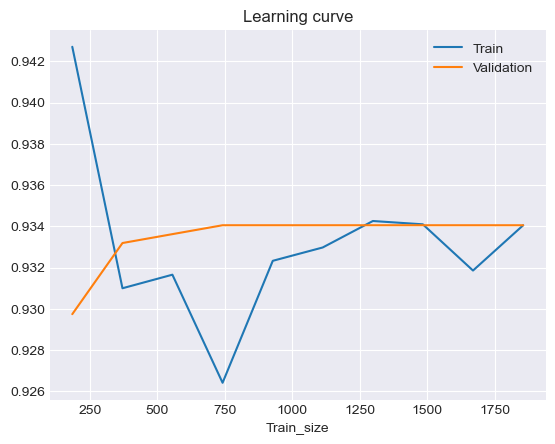

In [115]:
N, train_score, val_score = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1,1,10))

print(N)
plt.plot(N, train_score.mean(axis=1), label = "Train")
plt.plot(N, val_score.mean(axis=1), label = "Validation")
plt.xlabel("Train_size")
plt.title("Learning curve")
plt.legend()

In [119]:
X_test_manual = np.array([[6.0, 4.0, 2, 6.0, 8.0]])

prediction = model.predict(X_test_manual)
print("Prédiction :", prediction)

probabilities = model.predict_proba(X_test_manual)
print("Probabilités :", probabilities)


Prédiction : [1]
Probabilités : [[0.42308723 0.57691277]]
